In [ ]:
!nvidia-smi

Fri Mar 22 10:25:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
from scipy.stats import norm
import os
import cv2
import time


In [ ]:
class Fire_detect:

  def __init__(self):

    if torch.cuda.is_available() == False:
      self.dev = 'cpu'
      print("The program will run using the device's CPU")
    elif torch.cuda.is_available() == True:
      self.dev = 'cuda'
      print("The program will run using the device's GPU")

    self.model = YOLO("/content/drive/MyDrive/runs3/detect/train/weights/best.pt")

    self.file_name = input("Enter the filename or the path to the file:- ")

    self.run_name = input("Enter the result filename (Output Filename):- ")

    self.folder = f'{self.run_name} Data Results'

    os.makedirs(self.folder, exist_ok=True)

    self.height_array = np.array([])
    self.width_array = np.array([])
    self.x_array = np.array([])
    self.y_array = np.array([])

    self.b_value_top = np.array([])
    self.b_value_mid = np.array([])
    self.b_value_bot = np.array([])

    self.g_value_top = np.array([])
    self.g_value_mid = np.array([])
    self.g_value_bot = np.array([])

    self.r_value_top = np.array([])
    self.r_value_mid = np.array([])
    self.r_value_bot = np.array([])

    self.top_array = np.array([])
    self.mid_array = np.array([])
    self.bot_array = np.array([])

    self.start_time = time.time()

    self.fire_detection()
    self.height_detection()
    self.height_analysis()
    self.color_detection()

    self.save()

    self.elapsed_time = time.time() - self.start_time

    hours, rem = divmod(self.elapsed_time, 3600)
    minutes, seconds = divmod(rem, 60)

    print(" ")
    print("Elapsed time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

  def fire_detection(self):

    self.flame_detect = self.model.predict(source=f'{self.file_name}', conf=0.5, device=f'{self.dev}', save=True)
    clear_output(wait=True)
    if self.dev == 'cpu':
      print("The program will run using the device's CPU")
    elif self.dev == 'cuda':
      print("The program will run using the device's GPU")

    print(f'Enter the filename or the path to the file:- {self.file_name}')
    print(f'Enter the result filename (Output Filename):- {self.run_name}')
    print(" ")
    print('Video results saved to \033[1mruns/detect/predict\033[0m')

  def height_detection(self):

    if self.dev == 'cpu':
      for r in self.flame_detect:
        box = r.boxes.xywh.numpy()
        width = box[0,2]
        height = box[0,3]
        x_cor = box[0,0]
        y_cor = box[0,1]
        self.x_array = np.append(self.x_array, x_cor)
        self.y_array = np.append(self.y_array, y_cor)
        self.height_array = np.append(self.height_array, height)
        self.width_array = np.append(self.width_array, width)

    elif self.dev == 'cuda':
      for r in self.flame_detect:
        box = r.boxes.xywh.cpu()
        box = box.numpy()
        height = box[:,3]
        width = box[:,2]
        x_cor = box[:,0]
        y_cor = box[:,1]
        self.x_array = np.append(self.x_array, x_cor)
        self.y_array = np.append(self.y_array, y_cor)
        self.height_array = np.append(self.height_array, height)
        self.width_array = np.append(self.width_array, width)

    np.savetxt(f'{self.folder}/Height array({self.run_name}).txt', self.height_array, fmt='%0.2f')
    print(" ")
    print(f'Height array is saved as:- "Height array({self.run_name}).txt"')

  def height_analysis(self):

    self.max_height = np.max(self.height_array)
    print(" ")
    print(f'\033[1mThe maximum height\033[0m of the flame in pixels: {self.max_height:.2f}')

    self.min_height = np.min(self.height_array)
    print(" ")
    print(f'\033[1mThe minimum height\033[0m of the flame in pixels: {self.min_height:.2f}')

    self.std_height = np.std(self.height_array)
    print(" ")
    print(f'\033[1mThe standard deviation\033[0m of the fluctuating height of the flame in pixels: {self.std_height:.2f}')

    self.mean_height = np.mean(self.height_array)
    print(" ")
    print(f'\033[1mThe mean height\033[0m of the flame in pixels: {self.mean_height:.2f}')
    print(" ")

    frame = np.arange(len(self.height_array))
    x_m = np.where(self.height_array == self.max_height)
    x_m = x_m[0]
    x_max = x_m[0]
    max_point = (x_max, self.max_height)

    x_min = np.where(self.height_array == self.min_height)
    x_min = x_min[0]
    x_mini = x_min[0]
    min_point = (x_mini, self.min_height)

    plt.plot(frame, self.height_array, label='Flame Height')

    plt.scatter(*max_point, color='red', label='Max', marker='o')
    point = (max_point[0]+5, max_point[1]+5)
    plt.text(point[0], point[1], f'({max_point[0]:.2f}, {max_point[1]:.2f})', fontsize=7, color='black')
    plt.scatter(*min_point, color='blue', label='Min', marker='o')
    point = (min_point[0]+5, min_point[1]-5)
    plt.text(point[0], point[1], f'({min_point[0]:.2f}, {min_point[1]:.2f})', fontsize=7, color='black')

    plt.legend()
    plt.xlabel('Frame', fontsize=12)
    plt.ylabel('Bounding Box Height (in Pixels)', fontsize=12)
    plt.xlim(0,len(frame)+100)
    plt.ylim(0,self.max_height+50)
    plt.title('Plot of Height of Flame from Bounding Box against Frame Time', fontsize=14, y=1.05)

    plt.savefig(f'{self.folder}/Plot of height({self.run_name}).png')
    plt.show()

    print(' ')

    data = np.random.normal(loc=self.mean_height, scale=self.std_height, size=1000)

    plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Histogram')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, loc=self.mean_height, scale=self.std_height)

    plt.plot(x, pdf, 'k', linewidth=2, label='PDF')

    plt.legend()

    plt.xlabel('Height')
    plt.ylabel('Density')
    plt.title('Normal Distribution')

    plt.savefig(f'{self.folder}/Normal Distribution ({self.run_name}).png')
    plt.show()

    print(" ")
    print(f'Plot of height is saved as:- "Plot of height({self.run_name}).png".')
    print(f'Plot of normal distribution is saved as:- "Normal Distribution ({self.run_name}).png".')

  def save_color_as_png(self, rgb, savefile):
    # Create a numpy array representing the color
    color_np = np.zeros((100, 100, 3), dtype=np.uint8)
    color_np[:, :] = rgb  # Fill the array with the specified RGB color

    # Save the color image
    cv2.imwrite(savefile, color_np)

  def color_detection(self):

    self.video_path = self.file_name

    cap = cv2.VideoCapture(self.video_path)

    self.output_folder = 'extracted images'

    os.makedirs(self.output_folder, exist_ok=True)

    frame_count = 0
    interval = 20

    while cap.isOpened():
      ret, frame = cap.read()

      if not ret:
        break

      if frame_count % interval == 0:
        image_path = os.path.join(self.output_folder, f'frame_{frame_count}.jpg')
        cv2.imwrite(image_path, frame)

        x = int(self.x_array[frame_count])
        y = int(self.y_array[frame_count])
        h = int(self.height_array[frame_count])

        x_pos_top = int(x)
        y_pos_top = int(y-h/2+50)

        y_pos_bot = int(y+h/2-50)
        x_pos_bot = int(x)

        x_pos_mid = int(x)
        y_pos_mid = int(y)

        image = cv2.imread(image_path)

        pixel_bgr_top = image[y_pos_top, x_pos_top]
        if self.top_array.size == 0:
          self.top_array = pixel_bgr_top
        else:
          self.top_array = np.vstack([self.top_array, pixel_bgr_top])

        pixel_bgr_mid = image[y_pos_mid, x_pos_mid]
        if self.mid_array.size == 0:
          self.mid_array = pixel_bgr_mid
        else:
          self.mid_array = np.vstack([self.mid_array, pixel_bgr_mid])

        pixel_bgr_bot = image[y_pos_bot, x_pos_bot]
        if self.bot_array.size == 0:
          self.bot_array = pixel_bgr_bot
        else:
          self.bot_array = np.vstack([self.bot_array, pixel_bgr_bot])

        self.b_value_top = np.append(self.b_value_top, pixel_bgr_top[0])
        self.b_value_mid = np.append(self.b_value_mid, pixel_bgr_mid[0])
        self.b_value_bot = np.append(self.b_value_bot, pixel_bgr_bot[0])

        self.g_value_top = np.append(self.g_value_top, pixel_bgr_top[1])
        self.g_value_mid = np.append(self.g_value_mid, pixel_bgr_mid[1])
        self.g_value_bot = np.append(self.g_value_bot, pixel_bgr_bot[1])

        self.r_value_top = np.append(self.r_value_top, pixel_bgr_top[2])
        self.r_value_mid = np.append(self.r_value_mid, pixel_bgr_mid[2])
        self.r_value_bot = np.append(self.r_value_bot, pixel_bgr_bot[2])

      frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

    np.savetxt(f'{self.folder}/Top pixel BGR value({self.run_name}).txt', self.top_array, fmt='%0.2f')
    np.savetxt(f'{self.folder}/Mid pixel BGR value({self.run_name}).txt', self.mid_array, fmt='%0.2f')
    np.savetxt(f'{self.folder}/Bot pixel BGR value({self.run_name}).txt', self.bot_array, fmt='%0.2f')

    print(" ")
    print("Pixel BGR value array for top, mid, bot pixel is saved.")

    avg_top_b = np.average(self.b_value_top)
    avg_top_g = np.average(self.g_value_top)
    avg_top_r = np.average(self.r_value_top)

    self.avg_top_val = np.array([avg_top_b, avg_top_g, avg_top_r])

    print(" ")
    print(f"The top pixel average BGR values = {self.avg_top_val}")

    avg_mid_b = np.average(self.b_value_mid)
    avg_mid_g = np.average(self.g_value_mid)
    avg_mid_r = np.average(self.r_value_mid)

    self.avg_mid_val = np.array([avg_mid_b, avg_mid_g, avg_mid_r])

    print(" ")
    print(f"The mid pixel average BGR values = {self.avg_mid_val}")

    avg_bot_b = np.average(self.b_value_bot)
    avg_bot_g = np.average(self.g_value_bot)
    avg_bot_r = np.average(self.r_value_bot)

    self.avg_bot_val = np.array([avg_bot_b, avg_bot_g, avg_bot_r])

    print(" ")
    print(f"The bot pixel average BGR values = {self.avg_bot_val}")

    self.save_color_as_png(self.avg_bot_val, f"{self.folder}/Average bot pixel BGR color.png")
    self.save_color_as_png(self.avg_top_val, f"{self.folder}/Average top pixel BGR color.png")
    self.save_color_as_png(self.avg_mid_val, f"{self.folder}/Average mid pixel BGR color.png")

    print(" ")
    print(f"The color of each average BGR values for top, mid, bot pixel are saved.")

  def save(self):
    results = f"""The maximum height of the flame in pixels: {self.max_height:.2f}
    \nThe minimum height of the flame in pixels: {self.min_height:.2f}
    \nThe standard deviation of the fluctuating height of the flame in pixels: {self.std_height:.2f}
    \nThe mean height of the flame in pixels: {self.mean_height:.2f}
    \nThe top pixel average BGR values = {self.avg_top_val}
    \nThe mid pixel average BGR values = {self.avg_mid_val}
    \nThe bot pixel average BGR values = {self.avg_bot_val}"""

    with open(f"{self.folder}/results_{self.run_name}.txt", "w") as file:
      file.write(results)

  def plot_color(self):
    top_bgr = self.avg_top_val[::-1]
    color_image_top = np.full((1, 1, 3), top_bgr, dtype=np.uint8)

    mid_bgr = self.avg_mid_val[::-1]
    color_image_mid = np.full((1, 1, 3), mid_bgr, dtype=np.uint8)

    bot_bgr = self.avg_bot_val[::-1]
    color_image_bot = np.full((1, 1, 3), bot_bgr, dtype=np.uint8)

    plt.imshow(color_image_top)
    plt.axis('off')
    plt.show()

    plt.imshow(color_image_mid)
    plt.axis('off')
    plt.show()

    plt.imshow(color_image_bot)
    plt.axis('off')
    plt.show()

The program will run using the device's GPU
Enter the filename or the path to the file:- /content/1150_7.mp4
Enter the result filename (Output Filename):- 1150_7
 
Video results saved to runs/detect/predict
 
Height array is saved as:- "Height array(1150_7).txt"
 
The maximum height of the flame in pixels: 267.07
 
The minimum height of the flame in pixels: 132.28
 
The standard deviation of the fluctuating height of the flame in pixels: 20.23
 
The mean height of the flame in pixels: 184.43
 


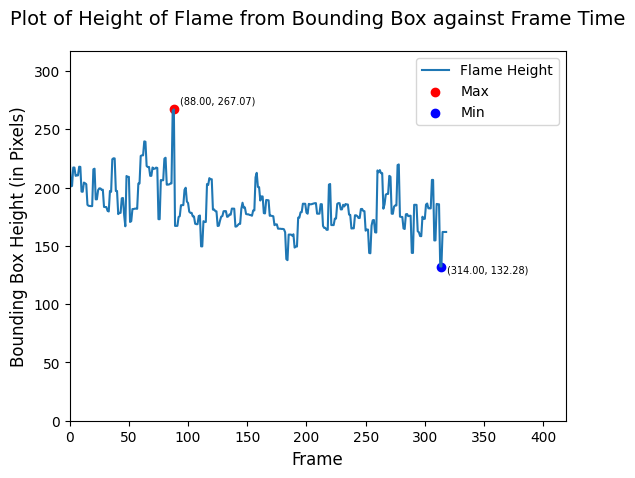

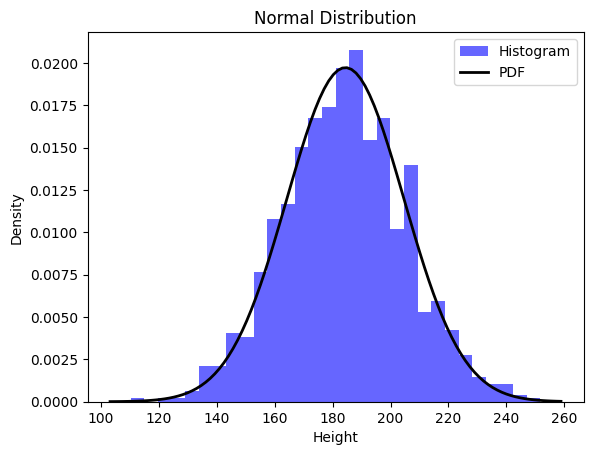

 
Plot of height is saved as:- "Plot of height(1150_7).png".
Plot of normal distribution is saved as:- "Normal Distribution (1150_7).png".
 
Pixel BGR value array for top, mid, bot pixel is saved.
 
The top pixel average BGR values = [     21.125      48.688        61.5]
 
The mid pixel average BGR values = [       80.5      135.31      142.81]
 
The bot pixel average BGR values = [      235.5      250.44         220]
 
The color of each average BGR values for top, mid, bot pixel are saved.
 
Elapsed time: 00:00:15.80


In [ ]:
test = Fire_detect()

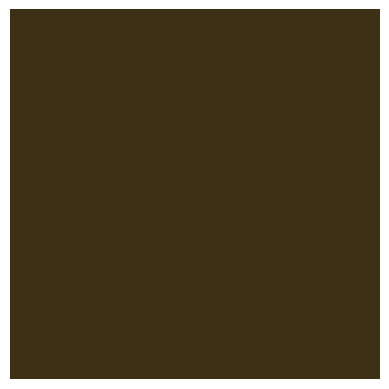

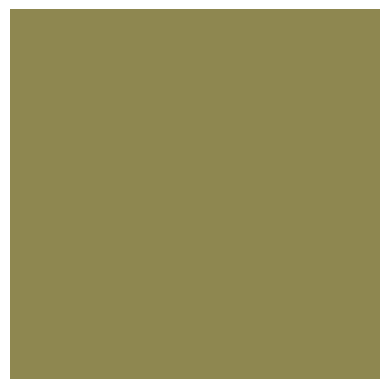

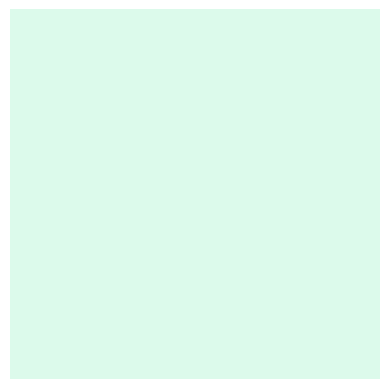

In [ ]:
test.plot_color()